# ISIT Presentation

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time
sys.path.insert(0, '../src/')

In [2]:
from general_utilies import autoscale_y, exp_df_dict_loader
from pnml_utilities import get_argmax_prediction, get_mean_prediction, predictor_using_mdl
from pnml_utilities import predictor_using_taylor
fig = plt.figure()
figsize = fig.get_size_inches()
figsize

array([6., 4.])

<Figure size 432x288 with 0 Axes>

# Parameters

In [3]:
output_dir = '../output/isit_presentation_figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

pyplot_dict = {'xlim': [], 'ylim': [], 'train_color': 'r', 'grid': True}

# Polynomial Degree Experiment

In [4]:
# Load dataset
base_dir = '../output/isit_presentation_results_20190620_140841'

# Load from pickle
regret_df = pd.read_pickle(os.path.join(base_dir, 'regret_df.pkl'))
exp_df_dict = exp_df_dict_loader(base_dir)
with open(os.path.join(base_dir, 'trainset_dict.pkl'), 'rb') as handle:
    trainset_dict = pickle.load(handle)
x_train = trainset_dict['x_train']
y_train = trainset_dict['y_train']
x_test = regret_df.index.tolist()
exp_df_dict.pop('Twice', None)
print('Train set: ', x_train)
print('Test set: {} to {}'.format(x_test[0], x_test[-1]))
print('exp_df_dict keys: {}'.format(exp_df_dict.keys()))

prediction_dict = get_argmax_prediction(exp_df_dict)

color = {key: c for key, c in zip(
    exp_df_dict.keys(), ['navy', 'green', 'black'])}

Train set:  [-0.7, -0.6, 0.05, 0.1, 0.25, 0.3, 0.35, 0.5, 0.55, 0.6]
Test set: -1.0 to 0.99
exp_df_dict keys: dict_keys(['3', '6', '10'])


argmax prediction: 10 degree


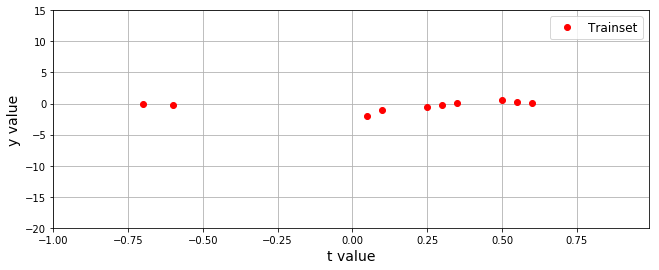

argmax prediction: 10 degree


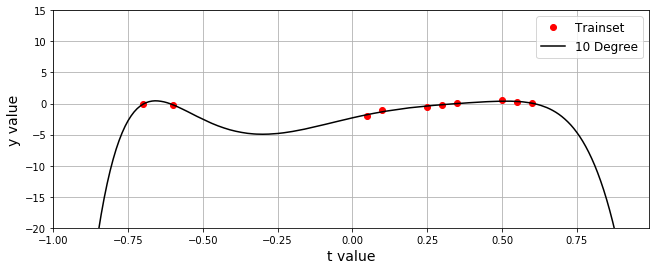

argmax prediction: all degrees


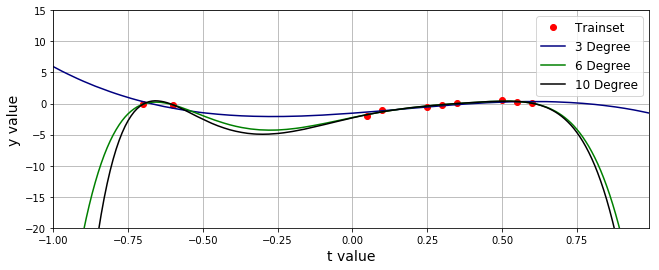

In [5]:
print('argmax prediction: 10 degree')
fig, ax = plt.subplots(facecolor='w', figsize=((16/9)*figsize[0], figsize[1]))
ax.plot(x_train, y_train, 'o', label='Trainset', color='r')
ax.set_ylabel('y value', size=14)
ax.grid(True)
ax.set_xlim(x_test[0], x_test[-1])
ax.set_ylim(-20, 15)
ax.set_xlabel('t value', size=14)
ax.legend(prop={'size': 12})
plt.savefig(os.path.join(output_dir, 'figure_trainset.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()

# Plot mean prediction
print('argmax prediction: 10 degree')
fig, ax = plt.subplots(facecolor='w', figsize=((16/9)*figsize[0], figsize[1]))
ax.plot(x_train, y_train, 'o', label='Trainset', color='r')
poly_degree = '10'
prediction = prediction_dict[poly_degree]
ax.plot(prediction.index.astype(float), prediction.values, color=color[poly_degree],
        label='%s Degree' % poly_degree)
ax.set_ylabel('y value', size=14)
ax.grid(True)
ax.set_xlim(x_test[0], x_test[-1])
ax.set_ylim(-20, 15)
ax.set_xlabel('t value', size=14)
ax.legend(prop={'size': 12})
plt.savefig(os.path.join(output_dir, 'figure_poly_experiment_prediction_10_deg.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()

# Plot mean prediction
print('argmax prediction: all degrees')
fig, ax = plt.subplots(facecolor='w', figsize=((16/9)*figsize[0], figsize[1]))
ax.plot(x_train, y_train, 'o', label='Trainset', color='r')
for poly_degree, prediction in prediction_dict.items():
    ax.plot(prediction.index.astype(float), prediction.values, color=color[poly_degree],
            label='%s Degree' % poly_degree)
ax.set_ylabel('y value', size=14)
ax.grid(True)
ax.set_xlim(x_test[0], x_test[-1])
ax.set_ylim(-20, 15)
ax.set_xlabel('t value', size=14)
ax.legend(prop={'size': 12})
plt.savefig(os.path.join(output_dir, 'figure_poly_experiment_prediction_all.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()

pNML Regret 10 degree


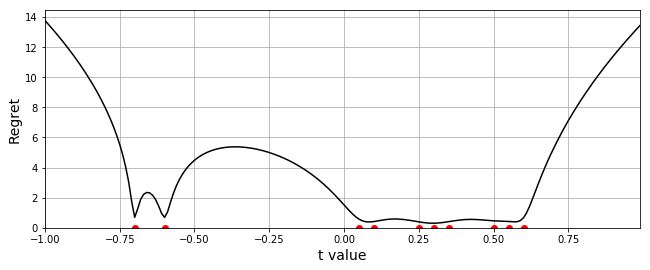

pNML Regret


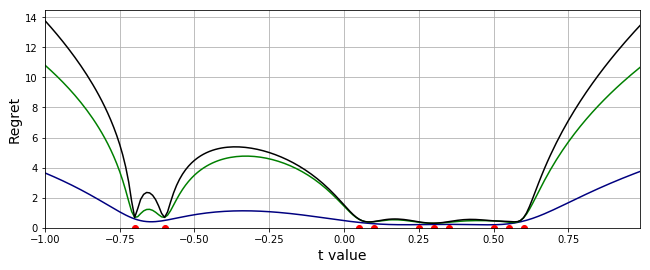

In [6]:
# Regret plot
print('pNML Regret 10 degree')
fig, ax = plt.subplots(facecolor='w', figsize=((16/9)*figsize[0], figsize[1]))
poly_degree = '10'
regret = regret_df[int(poly_degree)]
ax.plot(regret.index, regret.values, color=color[str(poly_degree)],
        label='%s Degree' % poly_degree)
ax.set_ylabel('Regret', size=14)
ax.set_ylim(bottom=0.0)
ax.grid(True)
ax.plot(x_train, [0] * len(x_train), 'o', label='Trainset', color='r')
ax.set_xlim(x_test[0], x_test[-1])
ax.set_xlabel('t value', size=14)
plt.savefig(os.path.join(output_dir, 'figure_poly_experiment_regret_10_deg.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()

print('pNML Regret')
fig, ax = plt.subplots(facecolor='w', figsize=((16/9)*figsize[0], figsize[1]))
for poly_degree, regret in regret_df.iteritems():
    ax.plot(regret.index, regret.values, color=color[str(poly_degree)],
            label='%s Degree' % poly_degree)
ax.set_ylabel('Regret', size=14)
ax.set_ylim(bottom=0.0)
ax.grid(True)
ax.plot(x_train, [0] * len(x_train), 'o', label='Trainset', color='r')
ax.set_xlim(x_test[0], x_test[-1])
ax.set_xlabel('t value', size=14)
# ax.legend()
plt.savefig(os.path.join(output_dir, 'figure_poly_experiment_regret_all.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()

# Lambda Experiment

In [7]:
# Load dataset
base_dir = '../output/isit_presentation_results_20190623_102821'

# Load from pickle
regret_df = pd.read_pickle(os.path.join(base_dir, 'regret_df.pkl'))
exp_df_dict = exp_df_dict_loader(base_dir)
with open(os.path.join(base_dir, 'trainset_dict.pkl'), 'rb') as handle:
    trainset_dict = pickle.load(handle)
x_train = trainset_dict['x_train']
y_train = trainset_dict['y_train']
x_test = regret_df.index.tolist()
exp_df_dict.pop('Twice', None)
print('Train set: ', x_train)
print('Test set: {} to {}'.format(x_test[0], x_test[-1]))
print('exp_df_dict keys: {}'.format(exp_df_dict.keys()))

# Load
prediction_dict = get_argmax_prediction(exp_df_dict)

color = {key: c for key, c in zip(
    exp_df_dict.keys(), ['navy', 'green', 'black'])}

Train set:  [-0.7, -0.6, 0.05, 0.1, 0.25, 0.3, 0.35, 0.5, 0.55, 0.6]
Test set: -1.0 to 0.99
exp_df_dict keys: dict_keys(['1e-06', '0.001', '0.1'])


argmax prediction: all degrees


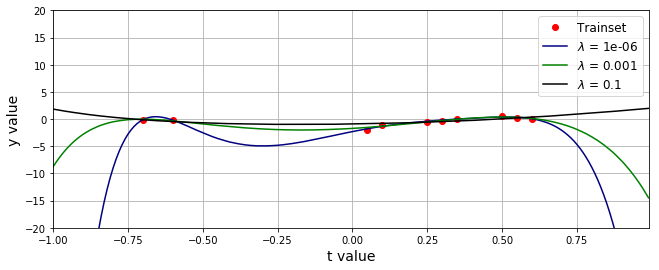

In [8]:
# Plot mean prediction
print('argmax prediction: all degrees')
fig, ax = plt.subplots(facecolor='w', figsize=((16/9)*figsize[0], figsize[1]))
ax.plot(x_train, y_train, 'o', label='Trainset', color='r')
for poly_degree, prediction in prediction_dict.items():
    ax.plot(prediction.index.astype(float), prediction.values, color=color[poly_degree],
            label=r'$\lambda$ = %s' % poly_degree)
ax.set_ylabel('y value', size=14)
ax.grid(True)
ax.set_xlim(x_test[0], x_test[-1])
ax.set_ylim(-20, 20)
ax.set_xlabel('t value', size=14)
ax.legend(prop={'size': 12})
plt.savefig(os.path.join(output_dir, 'figure_lambda_experiment_prediction_all.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()

pNML Regret


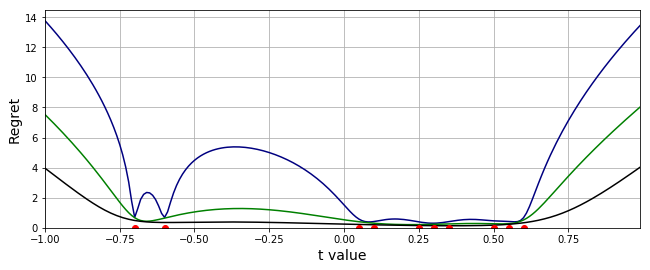

In [9]:
print('pNML Regret')
fig, ax = plt.subplots(facecolor='w', figsize=((16/9)*figsize[0], figsize[1]))
for poly_degree, regret in regret_df.iteritems():
    ax.plot(regret.index, regret.values, color=color[str(poly_degree)],
            label='%s Degree' % poly_degree)
ax.set_ylabel('Regret', size=14)
ax.set_ylim(bottom=0.0)
ax.grid(True)
ax.plot(x_train, [0] * len(x_train), 'o', label='Trainset', color='r')
ax.set_xlim(x_test[0], x_test[-1])
ax.set_xlabel('t value', size=14)
plt.savefig(os.path.join(output_dir, 'figure_lambda_experiment_regret_all.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()